In [5]:
import logging
from uscode import USCode
from citation_network import CitationNetwork

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [6]:
usc = USCode('data/usc201307/')

Loading data...


In [7]:
cn = CitationNetwork(usc.all_sections())

Intializing nodes...
Building network...


In [8]:
print("Nodes", cn.n_nodes)
print("Edges", cn.n_edges)
print("Weight", cn.total_weight())

Nodes 53926
Edges 123870
Weight 196191


In [9]:
sorted_indeg = sorted(cn.nodes.values(), key=lambda x: x.indegree, reverse=True)
sorted_outdeg = sorted(cn.nodes.values(), key=lambda x: x.outdegree, reverse=True)

def show_node_info(node):
    print("Title {:3} Section {:6} ".format(*node.section.location),
          "In: {:>3}".format(node.indegree),
          "Out: {:>3}".format(node.outdegree))

print("Highest Indegree:")
for node in sorted_indeg[:5]:
    show_node_info(node)

print("\nHighest Outdegree:")
for node in sorted_outdeg[:5]:
    show_node_info(node)

Highest Indegree:
Title 6   Section 542     In: 921 Out:  20
Title 7   Section 8701    In: 711 Out:  36
Title 10  Section 101     In: 669 Out:  47
Title 26  Section 1       In: 618 Out: 155
Title 31  Section 1113    In: 533 Out: 242

Highest Outdegree:
Title 31  Section 1113    In: 533 Out: 242
Title 42  Section 201     In: 196 Out: 197
Title 3   Section 301     In: 368 Out: 192
Title 26  Section 1       In: 618 Out: 155
Title 42  Section 1396a   In:  96 Out: 144


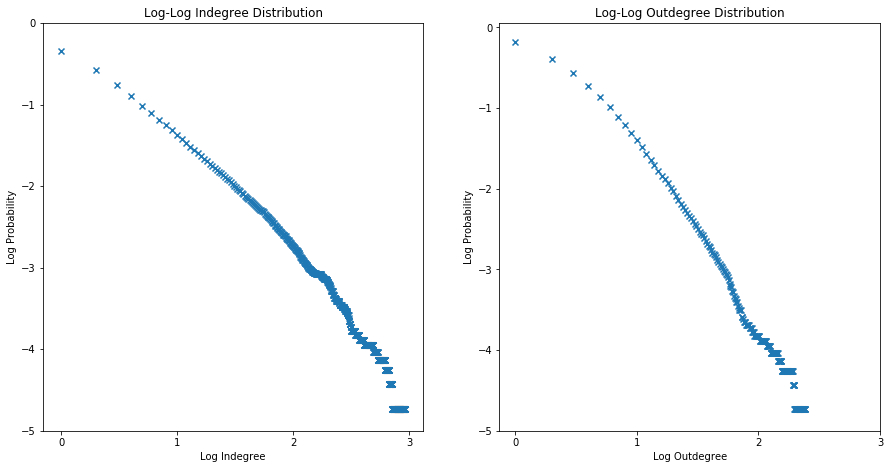

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(1000, -1, -1)
y_indeg, y_outdeg = [], []

i1 = i2 = 0
for x in x_range:
    while i1 < len(sorted_indeg) and sorted_indeg[i1].indegree >= x:
        i1 += 1
    y_indeg.append(i1)
    
    while i2 < len(sorted_outdeg) and sorted_outdeg[i2].outdegree >= x:
        i2 += 1
    y_outdeg.append(i2)
  
with np.errstate(divide='ignore'):
    x_range = np.log10(x_range)
    y_indeg = np.log10(np.array(y_indeg) / cn.n_nodes)
    y_outdeg = np.log10(np.array(y_outdeg) / cn.n_nodes)

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
for ax, y_range, name in zip(axs, [y_indeg, y_outdeg], ["Indegree", "Outdegree"]):
    ax.scatter(x_range, y_range, marker='x')
    
    
    ax.set_title("Log-Log {} Distribution".format(name))
    ax.set_xlabel("Log {}".format(name))
    ax.set_ylabel("Log Probability")
    ax.set_xticks(range(4))
    ax.set_yticks(range(-5, 1))
plt.show()

In [11]:
from search import Search

def show_results(results):
    for res in results:
        print("Title {:3} Section {:5}".format(*res[0].location), "Indegree: {:>3}".format(res[1]))

search = Search(usc, cn)

print("Full text search results (Top 5):")
ft_res = search.fulltext('copyright')
show_results(ft_res[:5])

print("\nBoolean search results (Top 5): ")
bl_res = search.boolean('copyright AND property AND NOT legal')
show_results(bl_res[:5])

Full text search results (Top 5):
Title 11  Section 101   Indegree: 289
Title 26  Section 501   Indegree: 219
Title 26  Section 170   Indegree:  92
Title 17  Section 101   Indegree:  56
Title 35  Section 2     Indegree:  55

Boolean search results (Top 5): 
Title 35  Section 2     Indegree:  55
Title 19  Section 1337  Indegree:  24
Title 19  Section 2412  Indegree:  18
Title 19  Section 2462  Indegree:  15
Title 19  Section 2241  Indegree:  13
